Fetching page: Bayesian learning mechanisms
Fetching page: Machine learning
Fetching page: Outline of machine learning
Fetching page: 80 Million Tiny Images
Fetching page: A Logical Calculus of the Ideas Immanent in Nervous Activity
Fetching page: Data science
Fetching page: Jeph Acheampong
Fetching page: Art Recognition
Fetching page: Artificial intelligence
Fetching page: Artificial intelligence content detection
Fetching page: Artificial intelligence
Fetching page: List of programming languages for artificial intelligence
Fetching page: Actor-critic algorithm
Fetching page: Admissible heuristic
Fetching page: AI alignment
Collected 15 articles for training.
Training Word2Vec model...
Word2Vec model training complete and saved!
Similarity between 'machine' and 'learning': 0.9690
Similarity between 'data' and 'science': 0.9813
Similarity between 'artificial' and 'intelligence': 0.9700


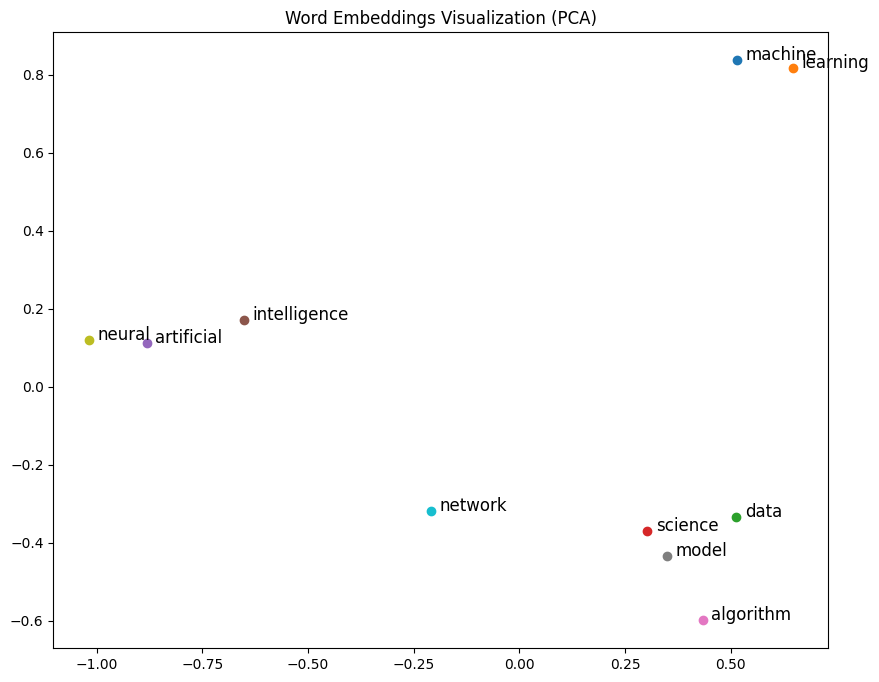

In [35]:
import wikipediaapi
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Fetch Wikipedia Articles
def fetch_wikipedia_articles(categories, max_articles=5):
    """
    Fetch articles from Wikipedia given a list of categories.
    :param categories: List of Wikipedia categories to fetch articles from.
    :param max_articles: Max number of articles per category.
    :return: List of sentences (tokenized text).
    """
    wiki_wiki = wikipediaapi.Wikipedia(
        language="en", user_agent="MyWikipediaApp/1.0 (https://example.com/)"
    )
    sentences = []

    for category in categories:
        cat_page = wiki_wiki.page(f"Category:{category}")
        if not cat_page.exists():
            print(f"Category '{category}' does not exist on Wikipedia.")
            continue

        count = 0
        for page in cat_page.categorymembers.values():
            if page.ns == 0 and count < max_articles:  # Only articles, not subcategories
                print(f"Fetching page: {page.title}")
                content = page.text
                words = content.lower().split()
                sentences.append(words)
                count += 1
            if count >= max_articles:
                break

    return sentences

# Fetch articles
categories = ["Machine learning", "Data science", "Artificial intelligence"]
sentences = fetch_wikipedia_articles(categories, max_articles=5)
print(f"Collected {len(sentences)} articles for training.")

# Step 2: Train Word2Vec Model
print("Training Word2Vec model...")
model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4, sg=1)  # Skip-gram model
model.save("wikipedia_word2vec.model")
print("Word2Vec model training complete and saved!")

# Step 3: Evaluate Word Embeddings
def word_similarity(word1, word2):
    try:
        similarity = model.wv.similarity(word1, word2)
        print(f"Similarity between '{word1}' and '{word2}': {similarity:.4f}")
    except KeyError as e:
        print(f"Word '{e.args[0]}' not found in vocabulary.")

# Test word similarities
word_similarity("machine", "learning")
word_similarity("data", "science")
word_similarity("artificial", "intelligence")

# Step 4: Visualize Word Embeddings
def visualize_embeddings(model, words):
    """Visualize word embeddings using PCA."""
    vectors = [model.wv[word] for word in words if word in model.wv]
    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(vectors)

    plt.figure(figsize=(10, 8))
    for i, word in enumerate(words):
        if word in model.wv:
            plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
            plt.text(reduced_vectors[i, 0] + 0.02, reduced_vectors[i, 1], word, fontsize=12)
    plt.title("Word Embeddings Visualization (PCA)")
    plt.show()

# Example visualization
visualize_embeddings(model, ["machine", "learning", "data", "science", "artificial", "intelligence", "algorithm", "model", "neural", "network"])


In [4]:
!pip install wikipedia-api


  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.8.1-py3-none-any.whl size=15384 sha256=ec970b3feb8dc756a0452a21f132cc63f0bf0116e79266e88381b83bb9315a00
  Stored in directory: /root/.cache/pip/wheels/0b/0f/39/e8214ec038ccd5aeb8c82b957289f2f3ab2251febeae5c2860
Successfully built wikipedia-api


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Fetching page: Bayesian learning mechanisms
Fetching page: Machine learning
Fetching page: Outline of machine learning
Fetching page: 80 Million Tiny Images
Fetching page: A Logical Calculus of the Ideas Immanent in Nervous Activity
Fetching page: Accelerated Linear Algebra
Fetching page: Action model learning
Fetching page: Active learning (machine learning)
Fetching page: Adversarial machine learning
Fetching page: AIOps
Fetching page: Data science
Fetching page: Jeph Acheampong
Fetching page: Art Recognition
Fetching page: Artificial intelligence
Fetching page: Artificial intelligence content detection
Fetching page: Biomedical data science
Fetching page: Data-driven astronomy
Fetching page: How Data Happened
Fetching page: List of important publications in data science
Fetching page: Model-based clustering
Fetching page: Artificial intelligence
Fetching page: List of programming languages for artificial intelligence
Fetching page: Actor-critic algorithm
Fetching page: Admissible he

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


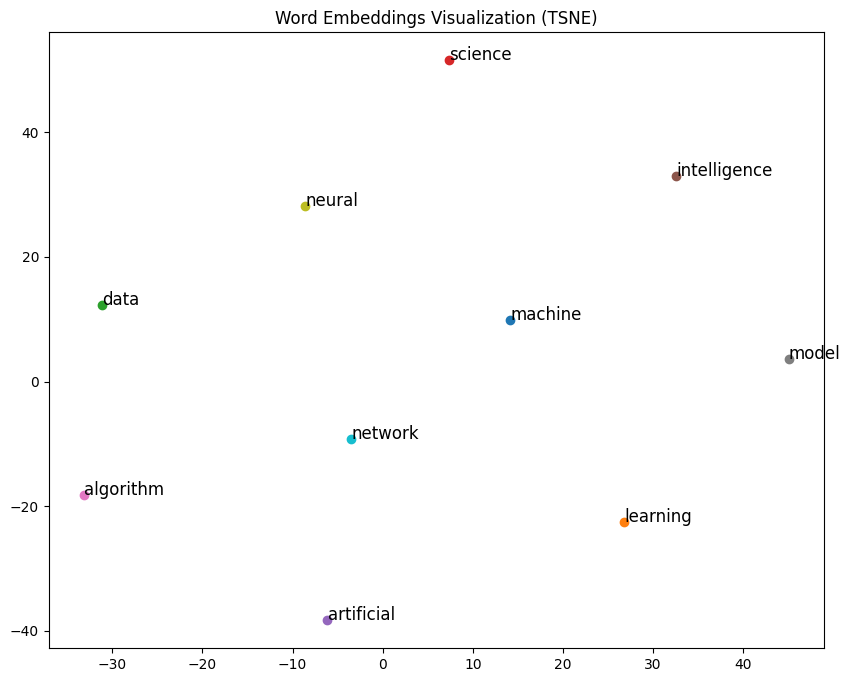

In [37]:
import wikipediaapi
import re
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec, FastText
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

nltk.download("stopwords")
nltk.download("wordnet")

# Step 1: Advanced Preprocessing
def preprocess_text(text):
    """Clean and preprocess text."""
    stop_words = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()

    # Lowercase and remove non-alphabetic characters
    text = re.sub(r"[^a-zA-Z\s]", "", text.lower())

    # Tokenize and remove stopwords
    tokens = [word for word in text.split() if word not in stop_words]

    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

# Step 2: Fetch Wikipedia Articles
def fetch_wikipedia_articles(categories, max_articles=5):
    """
    Fetch articles from Wikipedia given a list of categories.
    :param categories: List of Wikipedia categories to fetch articles from.
    :param max_articles: Max number of articles per category.
    :return: List of sentences (tokenized text).
    """
    wiki_wiki = wikipediaapi.Wikipedia(
        language="en", user_agent="MyWikipediaApp/1.0 (https://example.com/)"
    )
    sentences = []

    for category in categories:
        cat_page = wiki_wiki.page(f"Category:{category}")
        if not cat_page.exists():
            print(f"Category '{category}' does not exist on Wikipedia.")
            continue

        count = 0
        for page in cat_page.categorymembers.values():
            if page.ns == 0 and count < max_articles:  # Only articles, not subcategories
                print(f"Fetching page: {page.title}")
                content = page.text
                tokens = preprocess_text(content)
                sentences.append(tokens)
                count += 1
            if count >= max_articles:
                break

    return sentences

# Fetch articles
categories = ["Machine learning", "Data science", "Artificial intelligence"]
sentences = fetch_wikipedia_articles(categories, max_articles=10)
print(f"Collected {len(sentences)} articles for training.")

# Step 3: Train Word2Vec Model
print("Training Word2Vec model...")
model = Word2Vec(sentences, vector_size=200, window=10, min_count=3, workers=4, sg=1)  # Skip-gram model
model.save("wikipedia_word2vec_advanced.model")
print("Word2Vec model training complete and saved!")

# Step 4: Evaluate Word Embeddings
def word_similarity(word1, word2):
    try:
        similarity = model.wv.similarity(word1, word2)
        print(f"Similarity between '{word1}' and '{word2}': {similarity:.4f}")
    except KeyError as e:
        print(f"Word '{e.args[0]}' not found in vocabulary.")

# Test word similarities
word_similarity("machine", "learning")
word_similarity("data", "science")
word_similarity("artificial", "intelligence")

# Step 5: Visualize Word Embeddings
def visualize_embeddings(model, words, method="pca"):
    """Visualize word embeddings using PCA or t-SNE."""
    vectors = [model.wv[word] for word in words if word in model.wv]
    vectors = np.array(vectors)  # Convert to NumPy array

    if method == "pca":
        reducer = PCA(n_components=2)
    elif method == "tsne":
        perplexity = min(30, len(vectors) - 1)  # Ensure perplexity is valid
        reducer = TSNE(n_components=2, perplexity=perplexity, n_iter=300)
    reduced_vectors = reducer.fit_transform(vectors)

    plt.figure(figsize=(10, 8))
    for i, word in enumerate(words):
        if word in model.wv:
            plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
            plt.text(reduced_vectors[i, 0] + 0.02, reduced_vectors[i, 1], word, fontsize=12)
    plt.title(f"Word Embeddings Visualization ({method.upper()})")
    plt.show()

# Example visualization with t-SNE
visualize_embeddings(model, ["machine", "learning", "data", "science", "artificial", "intelligence", "algorithm", "model", "neural", "network"], method="tsne")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Fetching page: Bayesian learning mechanisms
Fetching page: Machine learning
Fetching page: Outline of machine learning
Fetching page: 80 Million Tiny Images
Fetching page: A Logical Calculus of the Ideas Immanent in Nervous Activity
Fetching page: Accelerated Linear Algebra
Fetching page: Action model learning
Fetching page: Active learning (machine learning)
Fetching page: Adversarial machine learning
Fetching page: AIOps
Fetching page: AIXI
Fetching page: Algorithm selection
Fetching page: Algorithmic bias
Fetching page: Algorithmic inference
Fetching page: Algorithmic party platforms in the United States
Fetching page: Anomaly detection
Fetching page: Aporia (company)
Fetching page: Apprenticeship learning
Fetching page: Artificial intelligence in hiring
Fetching page: Astrostatistics
Fetching page: Data science
Fetching page: Jeph Acheampong
Fetching page: Art Recognition
Fetching page: Artificial intelligence
Fetching page: Artificial intelligence content detection
Fetching page: 

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


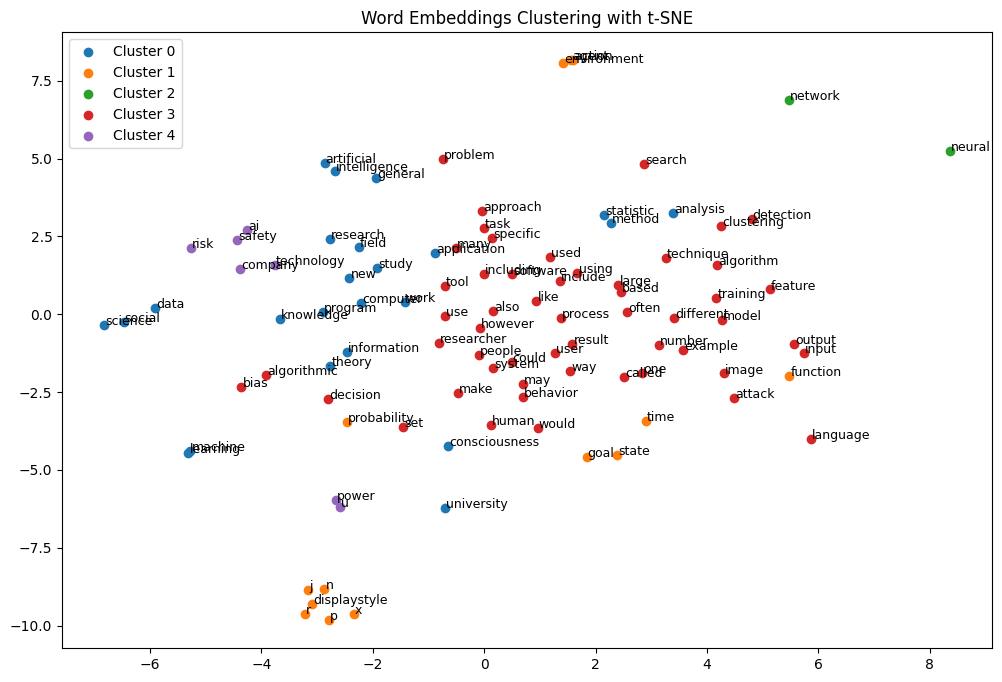

Similarity between 'machine' and 'learning': 0.9132
Similarity between 'data' and 'science': 0.7926
Similarity between 'artificial' and 'intelligence': 0.9161


In [38]:
import wikipediaapi
import re
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

nltk.download("stopwords")
nltk.download("wordnet")

# Step 1: Advanced Preprocessing
def preprocess_text(text):
    """Clean and preprocess text."""
    stop_words = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()

    # Lowercase and remove non-alphabetic characters
    text = re.sub(r"[^a-zA-Z\s]", "", text.lower())

    # Tokenize and remove stopwords
    tokens = [word for word in text.split() if word not in stop_words]

    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

# Step 2: Fetch Wikipedia Articles
def fetch_wikipedia_articles(categories, max_articles=20):
    """
    Fetch articles from Wikipedia given a list of categories.
    :param categories: List of Wikipedia categories to fetch articles from.
    :param max_articles: Max number of articles per category.
    :return: List of sentences (tokenized text).
    """
    wiki_wiki = wikipediaapi.Wikipedia(
        language="en", user_agent="MyWikipediaApp/1.0 (https://example.com/)"
    )
    sentences = []

    for category in categories:
        cat_page = wiki_wiki.page(f"Category:{category}")
        if not cat_page.exists():
            print(f"Category '{category}' does not exist on Wikipedia.")
            continue

        count = 0
        for page in cat_page.categorymembers.values():
            if page.ns == 0 and count < max_articles:  # Only articles, not subcategories
                print(f"Fetching page: {page.title}")
                content = page.text
                tokens = preprocess_text(content)
                sentences.append(tokens)
                count += 1
            if count >= max_articles:
                break

    return sentences

# Fetch articles
categories = ["Machine learning", "Data science", "Artificial intelligence"]
sentences = fetch_wikipedia_articles(categories, max_articles=20)
print(f"Collected {len(sentences)} articles for training.")

# Step 3: Train Word2Vec Model
print("Training Word2Vec model...")
model = Word2Vec(sentences, vector_size=200, window=10, min_count=3, workers=4, sg=1)  # Skip-gram model
model.save("wikipedia_word2vec_advanced.model")
print("Word2Vec model training complete and saved!")

# Step 4: Cluster and Visualize Word Embeddings
def visualize_clusters(model, num_clusters=5):
    """Visualize word embeddings with clustering."""
    words = list(model.wv.key_to_index.keys())[:100]  # Take the top 100 words
    vectors = np.array([model.wv[word] for word in words])

    # Perform clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(vectors)

    # Perform t-SNE for visualization
    tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
    reduced_vectors = tsne.fit_transform(vectors)

    # Plot the results with clusters
    plt.figure(figsize=(12, 8))
    for cluster in range(num_clusters):
        cluster_points = reduced_vectors[clusters == cluster]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")

    # Add labels
    for i, word in enumerate(words):
        plt.text(reduced_vectors[i, 0] + 0.02, reduced_vectors[i, 1], word, fontsize=9)

    plt.title("Word Embeddings Clustering with t-SNE")
    plt.legend()
    plt.show()

visualize_clusters(model, num_clusters=5)

# Step 5: Evaluate Word Embeddings with Similarity and Analogy
def word_similarity(word1, word2):
    try:
        similarity = model.wv.similarity(word1, word2)
        print(f"Similarity between '{word1}' and '{word2}': {similarity:.4f}")
    except KeyError as e:
        print(f"Word '{e.args[0]}' not found in vocabulary.")

# Test word similarities
word_similarity("machine", "learning")
word_similarity("data", "science")
word_similarity("artificial", "intelligence")


In [9]:
# Increase the number of words to 500 or more
similarity_df = compare_word_similarities(model, top_n=500)

# Save and display the updated results
similarity_df.to_csv("/content/word_similarities.csv", index=False)
print("Enhanced word similarity results saved to 'enhanced_word_similarities.csv'.")


Enhanced word similarity results saved to 'enhanced_word_similarities.csv'.


In [11]:
import pandas as pd
from itertools import combinations
from google.colab.data_table import DataTable

def compare_word_similarities(model, top_n=300):
    """
    Compare word similarities for the top N tokens in the Word2Vec vocabulary.
    :param model: Trained Word2Vec model.
    :param top_n: Number of top tokens to compare.
    :return: DataFrame containing word pairs and their similarity scores.
    """
    # Get the top N tokens from the vocabulary
    words = list(model.wv.key_to_index.keys())[:top_n]

    # Compute pairwise similarities
    word_pairs = list(combinations(words, 2))  # All possible word pairs
    similarities = [
        (word1, word2, model.wv.similarity(word1, word2))
        for word1, word2 in word_pairs
    ]

    # Convert to DataFrame
    similarity_df = pd.DataFrame(similarities, columns=["Word 1", "Word 2", "Similarity"])
    similarity_df.sort_values(by="Similarity", ascending=False, inplace=True)  # Sort by similarity

    return similarity_df

# Run the function and display the results
similarity_df = compare_word_similarities(model, top_n=100)

# Static Display: Top 100 Word Pairs
print("Top 100 Word Similarities:")
print(similarity_df.head(100))  # Display the top 100 most similar word pairs

# Interactive Table: Full Results
print("\nInteractive Table:")
DataTable(similarity_df)


Top 100 Word Similarities:
       Word 1       Word 2  Similarity
4630    input       output    0.965585
1567  network       neural    0.961491
3245    agent       action    0.955701
3658   action  environment    0.940682
94         ai       safety    0.933694
...       ...          ...         ...
4078    often         like    0.843584
1420  science          new    0.842548
4273    based         like    0.841325
755    system      however    0.841016
4583    large      include    0.840555

[100 rows x 3 columns]

Interactive Table:


,Word 1,Word 2,Similarity
4630,input,output,0.965585
1567,network,neural,0.961491
3245,agent,action,0.955701
3658,action,environment,0.940682
94,ai,safety,0.933694
...,...,...,...
2417,program,detection,-0.077994
3443,u,technique,-0.090070
3417,u,detection,-0.107315
1423,science,attack,-0.109844
